# Modelling Customers Feedback on Product (ML Modelling notebook)

Product size recommendation and fit prediction are critical in order to improve customers’ shopping experiences and to reduce product return rates. However, modeling customers’ fit feedback is challenging due to its subtle semantics, arising from the subjective evaluation of products and imbalanced label distribution (most of the feedbacks are "Fit").

As a data scientist your aim is to predict the customer satisfaction. This dataset contain imformation regarding clothes. Each observation is different fitting size with various features.

## About dataset :

The dataset has details of 82790 userId with the following 11 features.

|Features|Description|
|-----|-----|
| bra_size|integer value|
| cup_size| size of cloth|
| fit     |Target variable (fit/large/small)|
| Hips    | Size of Hips |
| item id | Id_number |
| length  |Length of cloth|
| size    |size of cloth|
| userID | user id of cutomer|

## Approach taken to solve the problem

* Performed EDA to get proper understanding of data (Check The EDA notebook)
* Load the data in pandas
* check for missing values
* Created a new dataframe with features required for modelling
* Conversion of Height from ft to cms
* Label Encoding of Categorical Features 
* dummy encoding of features
* Did some statistical analysis and imputed missing values with mean
* checked for data imbalance and treated it with smote 
* Applied Algorithms like logistic Regression,Decision Tree,Random Forest, XGboost and observed that Decision tree and random forest are not performing well as compared to XGboost and logistic regression 
* Used ensemble methods combined XGboost and logistic regression in voting classifier and  observed confusion matrix , log loss and precision and came to conclusion  that the combination of this model is doing well

In [1]:
#Importing Required Number of Libraries
#Importing Required Libraries
#_______________________________________________________________________________________________________________
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
#_______________________________________________________________________________________________________________
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#_______________________________________________________________________________________________________________
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score,f1_score
import itertools
from sklearn.model_selection import GridSearchCV, cross_val_score ,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
#load the data
path='./data/file.json'
df=pd.read_json(path,lines=True)
df

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.00,7,5.00,d,38.00,34.00,new,36,5ft 6in,Emily,just right,small,991571,nan,NaN,NaN,NaN
1,123373,31.00,13,3.00,b,30.00,36.00,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,nan,NaN,NaN,NaN
2,123373,30.00,7,2.00,b,nan,32.00,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.00,NaN,NaN,NaN
3,123373,nan,21,5.00,dd/e,nan,nan,new,NaN,NaN,alexmeyer626,just right,fit,875643,nan,NaN,NaN,NaN
4,123373,nan,18,5.00,b,nan,36.00,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,nan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,nan,8,4.00,b,nan,36.00,outerwear,NaN,5ft 8in,Jennifer,just right,fit,727820,8.50,average,Cute jacket!,Cute jacket!
82786,807722,nan,12,5.00,ddd/f,nan,34.00,outerwear,NaN,5ft 5in,Kelli,slightly long,small,197040,nan,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,nan,12,5.00,dddd/g,36.00,32.00,outerwear,NaN,5ft 4in,elacount,just right,fit,102493,nan,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,nan,12,4.00,NaN,nan,nan,outerwear,NaN,5ft 3in,jennaklinner,just right,fit,756491,nan,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


In [4]:
#Check missing values
# Function to identify the number of missing values in every feature
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_data(df)
print(missing_data)

                Total  Percent
waist           79908     0.97
bust            70936     0.86
shoe width      64183     0.78
shoe size       54875     0.66
hips            26726     0.32
review_summary   6725     0.08
review_text      6725     0.08
cup size         6255     0.08
bra size         6018     0.07
height           1107     0.01
quality            68     0.00
length             35     0.00
user_name           0     0.00
category            0     0.00
fit                 0     0.00
size                0     0.00
user_id             0     0.00
item_id             0     0.00


In [15]:
#Creating a new data frame for Modelling
df1=df[['cup size','bra size','height','quality','length','fit','size','category']]
df1

,cup size,bra size,height,quality,length,fit,size,category
0,d,34.00,5ft 6in,5.00,just right,small,7,new
1,b,36.00,5ft 2in,3.00,just right,small,13,new
2,b,32.00,5ft 7in,2.00,slightly long,small,7,new
3,dd/e,nan,NaN,5.00,just right,fit,21,new
4,b,36.00,5ft 2in,5.00,slightly long,small,18,new
...,...,...,...,...,...,...,...,...
82785,b,36.00,5ft 8in,4.00,just right,fit,8,outerwear
82786,ddd/f,34.00,5ft 5in,5.00,slightly long,small,12,outerwear
82787,dddd/g,32.00,5ft 4in,5.00,just right,fit,12,outerwear
82788,NaN,nan,5ft 3in,4.00,just right,fit,12,outerwear


In [16]:
#Conversion of height from ft to cms 
def get_cms(x):
    if type(x) == type(1.0):
        return

    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
df1['height']=df1['height'].apply(get_cms)
df1

,cup size,bra size,height,quality,length,fit,size,category
0,d,34.00,167.64,5.00,just right,small,7,new
1,b,36.00,157.48,3.00,just right,small,13,new
2,b,32.00,170.18,2.00,slightly long,small,7,new
3,dd/e,nan,nan,5.00,just right,fit,21,new
4,b,36.00,157.48,5.00,slightly long,small,18,new
...,...,...,...,...,...,...,...,...
82785,b,36.00,172.72,4.00,just right,fit,8,outerwear
82786,ddd/f,34.00,165.10,5.00,slightly long,small,12,outerwear
82787,dddd/g,32.00,162.56,5.00,just right,fit,12,outerwear
82788,NaN,nan,160.02,4.00,just right,fit,12,outerwear


In [17]:
#Dropping null values
#.dropna(inplace=True)
#Check for Unique values

#Label encoding of categorical features
le=LabelEncoder()
#df1['cup size']=le.fit_transform(df1['cup size'])
#df1['length']=le.fit_transform(df1['length'])
df1['fit']=le.fit_transform(df1['fit']) # target variable
#df1['category']=le.fit_transform(df1['category'])
df1=pd.get_dummies(df1,columns=['cup size','category','length'])
df1
df1.describe()

,bra size,height,quality,fit,size,cup size_a,cup size_aa,cup size_b,cup size_c,cup size_d,cup size_dd/e,cup size_ddd/f,cup size_dddd/g,cup size_h,cup size_i,cup size_j,cup size_k,category_bottoms,category_dresses,category_new,category_outerwear,category_sale,category_tops,category_wedding,length_just right,length_slightly long,length_slightly short,length_very long,length_very short
0,34.00,167.64,5.00,2,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,36.00,157.48,3.00,2,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,32.00,170.18,2.00,2,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,nan,nan,5.00,0,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,36.00,157.48,5.00,2,18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,36.00,172.72,4.00,0,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
82786,34.00,165.10,5.00,2,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
82787,32.00,162.56,5.00,0,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
82788,nan,160.02,4.00,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


,bra size,height,quality,fit,size,cup size_a,cup size_aa,cup size_b,cup size_c,cup size_d,cup size_dd/e,cup size_ddd/f,cup size_dddd/g,cup size_h,cup size_i,cup size_j,cup size_k,category_bottoms,category_dresses,category_new,category_outerwear,category_sale,category_tops,category_wedding,length_just right,length_slightly long,length_slightly short,length_very long,length_very short
count,76772.00,81683.00,82722.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00,82790.00
mean,35.97,165.47,3.95,0.47,12.66,0.06,0.00,0.18,0.22,0.20,0.15,0.07,0.02,0.01,0.00,0.00,0.00,0.18,0.23,0.26,0.05,0.03,0.25,0.00,0.75,0.14,0.08,0.03,0.01
std,3.22,7.25,0.99,0.75,8.27,0.23,0.06,0.38,0.42,0.40,0.36,0.26,0.15,0.11,0.05,0.05,0.05,0.39,0.42,0.44,0.22,0.17,0.43,0.06,0.43,0.34,0.27,0.17,0.10
min,28.00,91.44,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,34.00,160.02,3.00,0.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,36.00,165.10,4.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,38.00,170.18,5.00,1.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,48.00,241.30,5.00,2.00,38.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [18]:
#Imputation of values
# Function to impute missing values with mean or median
def fill_null_values(dataset, value):
    nulls = pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False))
    nulls = nulls[nulls>0]
    nulls.columns = ['Null Count']
    nulls.index.name = 'Feature'
    

    for column in nulls[nulls["Null Count"]> 0].index:
        if dataset[column].dtype == np.number and value == 0:
            dataset[column].fillna(dataset[column].mean(), inplace = True)
        elif value == 1:
            dataset[column].fillna(dataset[column].median(), inplace = True)
        else:
            dataset[column].fillna("NA", inplace = True)
    print(dataset.isnull().sum())
    return dataset

df1=fill_null_values(df1,0)

bra size                 0
height                   0
quality                  0
fit                      0
size                     0
cup size_a               0
cup size_aa              0
cup size_b               0
cup size_c               0
cup size_d               0
cup size_dd/e            0
cup size_ddd/f           0
cup size_dddd/g          0
cup size_h               0
cup size_i               0
cup size_j               0
cup size_k               0
category_bottoms         0
category_dresses         0
category_new             0
category_outerwear       0
category_sale            0
category_tops            0
category_wedding         0
length_just right        0
length_slightly long     0
length_slightly short    0
length_very long         0
length_very short        0
dtype: int64


In [19]:
#Check the class imbalance
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(df1['fit'])

0   68.56
1   15.77
2   15.67
Name: fit, dtype: float64

## Logistic Regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.77      0.65      0.71     16915
           1       0.32      0.41      0.36      3995
           2       0.29      0.40      0.33      3927

    accuracy                           0.57     24837
   macro avg       0.46      0.49      0.47     24837
weighted avg       0.62      0.57      0.59     24837

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Train: 0.5303866941083948
Test score: 0.5722108145106092


Log loss: 0.9659205460075576


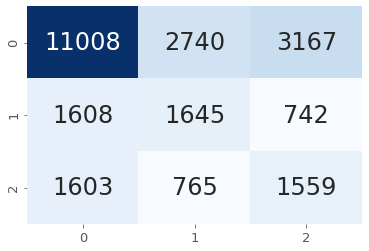

In [30]:
#Logistic Regression
from imblearn.over_sampling import SMOTE
X=df1.drop('fit',1)
y=df1['fit']
model = LogisticRegression(multi_class='multinomial',random_state=9)

#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
smote = SMOTE()
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)
model.fit(X_train_sm, y_train_sm)


y_pred=model.predict(X_test)

class_report=classification_report(y_test,y_pred)
print(class_report)
print('--'*100)
#train score
train_score=model.score(X_train_sm,y_train_sm)
print('Train:',train_score)
#test score
test_score=model.score(X_test,y_test)
print('Test score:',test_score)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#log loss
from sklearn.metrics import log_loss
LOG_LOSS=log_loss(y_test,model.predict_proba(X_test))
print('Log loss:',LOG_LOSS)

## Decision Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

              precision    recall  f1-score   support

           0       0.72      0.77      0.75     16915
           1       0.29      0.24      0.26      3995
           2       0.28      0.24      0.26      3927

    accuracy                           0.60     24837
   macro avg       0.43      0.42      0.42     24837
weighted avg       0.58      0.60      0.59     24837

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Train: 0.9185281863360273
Test score: 0.6030518983774208


Log loss: 11.187753278526143


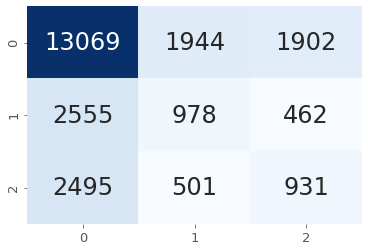

In [31]:
# Decision Tree
from imblearn.over_sampling import SMOTE
X=df1.drop('fit',1)
y=df1['fit']
model = DecisionTreeClassifier(random_state=9)

#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
smote = SMOTE()
X_train_sm1,y_train_sm1=smote.fit_sample(X_train,y_train)
model.fit(X_train_sm1, y_train_sm1)
y_pred=model.predict(X_test)

class_report=classification_report(y_test,y_pred)
print(class_report)
print('--'*100)
#train score
train_score=model.score(X_train_sm1,y_train_sm1)
print('Train:',train_score)
#test score
test_score=model.score(X_test,y_test)
print('Test score:',test_score)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#log loss
from sklearn.metrics import log_loss
LOG_LOSS=log_loss(y_test,model.predict_proba(X_test))
print('Log loss:',LOG_LOSS)

## Random Forest

In [32]:
from imblearn.over_sampling import SMOTE
X=df1.drop('fit',1)
y=df1['fit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
smote = SMOTE()
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)
rf_model=RandomForestClassifier(random_state=9)
rf_model.fit(X_train_sm, y_train_sm)
y_pred_1=rf_model.predict(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       0.72      0.80      0.76     15306
           1       0.33      0.26      0.29      3655
           2       0.31      0.23      0.27      3736

    accuracy                           0.62     22697
   macro avg       0.45      0.43      0.44     22697
weighted avg       0.59      0.62      0.60     22697

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0.9174782957612898
0.6186280125126669


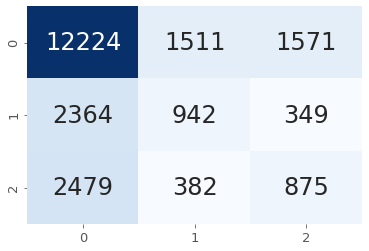

In [81]:
#Evaluation metric
class_report=classification_report(y_test,y_pred_1)
print(class_report)
print('--'*100)
#train score
train_score=rf_model.score(X_train_sm,y_train_sm)
print(train_score)
#test score
test_score=rf_model.score(X_test,y_test)
print(test_score)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_1)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [33]:
from sklearn.metrics import log_loss
LOG_LOSS=log_loss(y_test,rf_model.predict_proba(X_test))
print(LOG_LOSS)

2.103390864241544


## XGB Classifier


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=72, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

              precision    recall  f1-score   support

           0       0.72      0.91      0.81     16915
           1       0.48      0.23      0.31      3995
           2       0.44      0.19      0.26      3927

    accuracy                           0.69     24837
   macro avg       0.55      0.44      0.46     24837
weighted avg       0.64      0.69      0.64     24837

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0.7168740186012803
0.6865160848733745


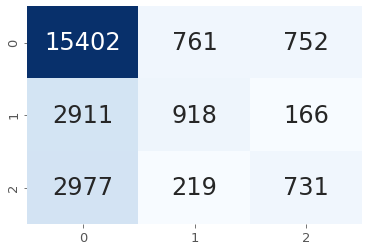

In [46]:
from imblearn.over_sampling import SMOTE
X=df1.drop('fit',1)
y=df1['fit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
smote = SMOTE()
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)
xgb_clf =XGBClassifier(random_state=72)
xgb_clf.fit(X_train_sm, y_train_sm)
y_pred_4=xgb_clf.predict(X_test)
#Evaluation metric
class_report=classification_report(y_test,y_pred_4)
print(class_report)
print('--'*100)
#train score
train_score=xgb_clf.score(X_train,y_train)
print(train_score)
#test score
test_score=xgb_clf.score(X_test,y_test)
print(test_score)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_4)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [47]:
from sklearn.metrics import log_loss
LOG_LOSS=log_loss(y_test,xgb_clf.predict_proba(X_test))
print(LOG_LOSS)

0.7880864915016038


## Ensemble Methods

In [48]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
X2=df1.drop('fit',1)
y2=df1['fit']

log_reg = LogisticRegression(multi_class='multinomial',random_state=9)
#______________________________________________________________________________________________________________________
x_train,x_test,y_train,y_test= train_test_split(X2,y2,test_size=0.2,random_state=18)
x_train_sm4, y_train_sm4 = smote.fit_sample(x_train,y_train)

#______________________________________________________________________________________________________________________
voting_clf_soft_2=VotingClassifier(estimators =[('logistic',log_reg),('xgb',xgb_clf)], voting = 'soft')
voting_clf_soft_2.fit(x_train_sm4, y_train_sm4)
y_pred_vote=voting_clf_soft_2.predict(x_test)

#______________________________________________________________________________________________________________________________ 
class_report=classification_report(y_test,y_pred_vote)
print(class_report)
#__________________________________________________________________________________________________________________________
from sklearn.metrics import log_loss
LOG_LOSS=log_loss(y_test,voting_clf_soft_2.predict_proba(x_test))
print('Log loss:',LOG_LOSS)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=9, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster=None,
                                            colsample_bylevel=1...
                                            max_delta_step=0, max_depth=6,
                           

              precision    recall  f1-score   support

           0       0.75      0.81      0.78     11348
           1       0.42      0.36      0.39      2659
           2       0.38      0.31      0.34      2551

    accuracy                           0.66     16558
   macro avg       0.52      0.49      0.50     16558
weighted avg       0.64      0.66      0.65     16558

Log loss: 0.8341781198935865


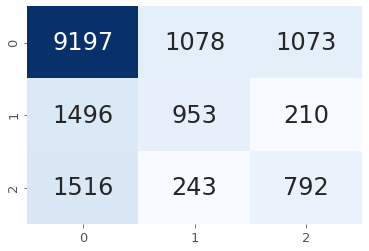

In [49]:
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_vote)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})